# Explaratory Data Analysis

Data Dictionary


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

In [2]:
df = pd.read_csv('../dataset/titanic/train.csv')

In [3]:
df.shape

(891, 12)

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
df['Gender'] = 0
df.loc[df['Sex']=='male', 'Gender'] = 1

In [8]:
df.drop(['PassengerId','Name','Ticket','Sex','Cabin'],axis=1,inplace=True)

In [9]:
df.shape

(891, 8)

In [10]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Gender
0,0,3,22.0,1,0,7.2500,S,1
1,1,1,38.0,1,0,71.2833,C,0
2,1,3,26.0,0,0,7.9250,S,0
3,1,1,35.0,1,0,53.1000,S,0
4,0,3,35.0,0,0,8.0500,S,1


In [11]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.477990
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [12]:
df[(df['SibSp']!=0)&(df['Parch']!=0)]

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Gender
7,0,3,2.0,3,1,21.0750,S,1
10,1,3,4.0,1,1,16.7000,S,0
13,0,3,39.0,1,5,31.2750,S,1
16,0,3,2.0,4,1,29.1250,Q,1
24,0,3,8.0,3,1,21.0750,S,0
...,...,...,...,...,...,...,...,...
856,1,1,45.0,1,1,164.8667,S,0
863,0,3,NaN,8,2,69.5500,S,0
869,1,3,4.0,1,1,11.1333,S,1
871,1,1,47.0,1,1,52.5542,S,0


In [19]:
df.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Gender', 'total_member'],
      dtype='object')

In [20]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [21]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [24]:
print("minimum age of the passenger ",df['Age'].min())
print("maximum age of the passenger ",df['Age'].max())
print("mean age of the passenger ",df['Age'].mean())
print("median age of the passenger ",df['Age'].median())
print("mode age of the passenger ",df['Age'].mode())

minimum age of the passenger  0.42
maximum age of the passenger  80.0
mean age of the passenger  29.69911764705882
median age of the passenger  28.0
mode age of the passenger  0    24.0
dtype: float64


In [30]:
pd.qcut(df['Age'], q=6)

0      (18.0, 23.0]
1      (34.0, 44.0]
2      (23.0, 28.0]
3      (34.0, 44.0]
4      (34.0, 44.0]
           ...     
886    (23.0, 28.0]
887    (18.0, 23.0]
888             NaN
889    (23.0, 28.0]
890    (28.0, 34.0]
Name: Age, Length: 891, dtype: category
Categories (6, interval[float64]): [(0.419, 18.0] < (18.0, 23.0] < (23.0, 28.0] < (28.0, 34.0] < (34.0, 44.0] < (44.0, 80.0]]

In [38]:
pd.cut(df['Age'], bins=8)

0      (20.315, 30.263]
1       (30.263, 40.21]
2      (20.315, 30.263]
3       (30.263, 40.21]
4       (30.263, 40.21]
             ...       
886    (20.315, 30.263]
887    (10.368, 20.315]
888                 NaN
889    (20.315, 30.263]
890     (30.263, 40.21]
Name: Age, Length: 891, dtype: category
Categories (8, interval[float64]): [(0.34, 10.368] < (10.368, 20.315] < (20.315, 30.263] < (30.263, 40.21] < (40.21, 50.158] < (50.158, 60.105] < (60.105, 70.052] < (70.052, 80.0]]

In [56]:
df['age_range'] = pd.cut(df['Age'], bins=8)
df['age_group'] = 0

In [70]:
def grouped(x):
    c = x.right
    if c < 11:
        return 1
    elif c < 21:
        return 2
    elif c < 31:
        return 3
    elif c < 41:
        return 4
    elif c < 51:
        return 5
    elif c < 61:
        return 6
    elif c < 71:
        return 7
    elif c < 81:
        return 8

In [72]:
df['age_group'] = df['age_range'].apply(grouped)

In [74]:
df.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Gender,total_member,age_range,age_group
0,0,3,22.0,1,0,7.2500,S,1,2,"(20.315, 30.263]",3
1,1,1,38.0,1,0,71.2833,C,0,2,"(30.263, 40.21]",4
2,1,3,26.0,0,0,7.9250,S,0,1,"(20.315, 30.263]",3
3,1,1,35.0,1,0,53.1000,S,0,2,"(30.263, 40.21]",4
4,0,3,35.0,0,0,8.0500,S,1,1,"(30.263, 40.21]",4
5,0,3,NaN,0,0,8.4583,Q,1,1,NaN,NaN
6,0,1,54.0,0,0,51.8625,S,1,1,"(50.158, 60.105]",6
7,0,3,2.0,3,1,21.0750,S,1,5,"(0.34, 10.368]",1
8,1,3,27.0,0,2,11.1333,S,0,3,"(20.315, 30.263]",3
9,1,2,14.0,1,0,30.0708,C,0,2,"(10.368, 20.315]",2


In [13]:
df['total_member'] = df['SibSp'] + df['Parch'] + 1

In [14]:
df.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Gender,total_member
0,0,3,22.0,1,0,7.2500,S,1,2
1,1,1,38.0,1,0,71.2833,C,0,2


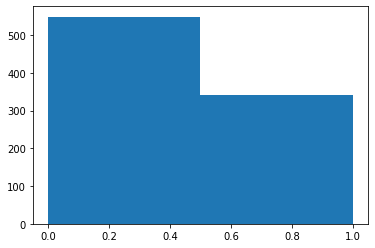

In [15]:
plt.hist(df['Survived'],bins=2)
plt.show()

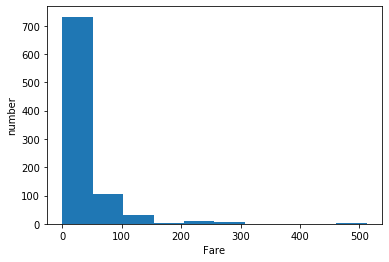

In [16]:
plt.hist(df['Fare'])
plt.xlabel('Fare')
plt.ylabel('number')
plt.show()

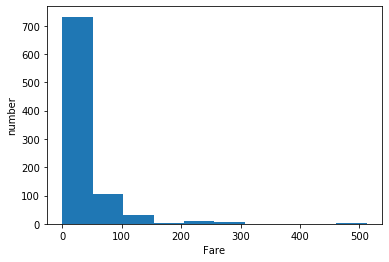

In [17]:
plt.hist(df['Fare'])
plt.xlabel('Fare')
plt.ylabel('number')
plt.show()

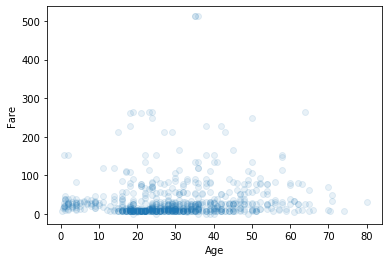

In [18]:
plt.scatter(df['Age'], df['Fare'], alpha=0.1)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()